**Foremost**

**Credits - Kaiye/Xi/Lu's model is used as a basis for this**

**major difference between our approach is that we are going to see if it makes sense to use returns instead of prices, and abs. change in some other metrics**

# 1) is big gaps between timeseries important? 
# 2) how to figure out most relevant columns and try to remove irrelevant to improve the test results? 

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing  
import seaborn as sb
import matplotlib as mpl
import matplotlib.pyplot as plt
from copy import deepcopy
import datetime
from tqdm import tqdm
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import sys    

# import customized utils
# from '/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/utils_folder/figsize.py' import * 

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
path_to_module = '/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/utils_folder/'
sys.path.append(path_to_module)


In [5]:
print(sys.path)
from figsize import * 

['/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython', '/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/utils_folder/']


# kinda EDA but not really EDA

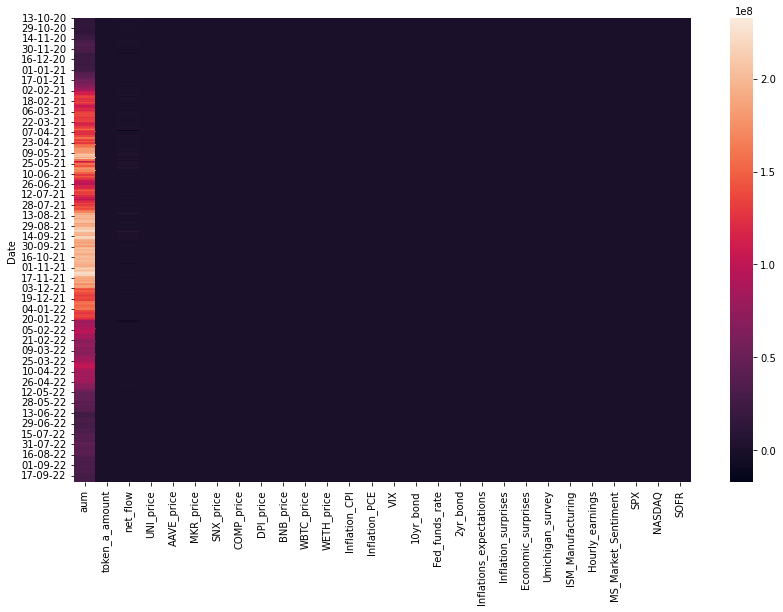

In [6]:

# read dataset 
DPI_dataset = pd.read_csv('/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/datasets/DPI_dataset_final_F.csv', index_col='Date') 

# DPI_dataset = pd.read_csv('/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/datasets/DPI_dataset_final_222.csv', index_col='Date') 

# DPI_dataset = DPI_dataset.drop(columns='net_flow') 


# build a figure for EDA 
fig, ax = create_figure(1000)
sb.heatmap(DPI_dataset, ax=ax) 

In [7]:
DPI_dataset.shape

(715, 28)

In [8]:
DPI_dataset.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
aum,715.0,1.020028e+08,6.258467e+07,1.341308e+07,3.877785e+07,9.742407e+07,1.486210e+08,2.329499e+08
token_a_amount,715.0,6.090270e+03,6.600586e+03,4.525493e+01,1.522811e+03,3.962456e+03,7.936230e+03,5.820852e+04
net_flow,715.0,1.553171e+05,1.378700e+06,-1.734913e+07,-1.191305e+05,0.000000e+00,2.772514e+05,1.027929e+07
UNI_price,715.0,1.567125e+01,1.020593e+01,2.022910e+00,6.325104e+00,1.439377e+01,2.447073e+01,4.348954e+01
AAVE_price,715.0,2.210192e+02,1.316536e+02,2.773033e+01,9.313982e+01,1.934258e+02,3.229736e+02,6.348663e+02
MKR_price,715.0,2.013230e+03,1.067834e+03,4.926945e+02,1.053290e+03,2.063765e+03,2.597884e+03,5.589366e+03
SNX_price,715.0,8.660951e+00,5.834031e+00,1.593611e+00,4.036014e+00,6.256118e+00,1.170687e+01,2.653768e+01
COMP_price,715.0,2.464497e+02,1.758724e+02,2.954849e+01,1.046396e+02,1.932239e+02,3.897840e+02,8.494576e+02
DPI_price,715.0,2.456674e+02,1.393533e+02,5.763149e+01,1.061705e+02,2.329734e+02,3.527766e+02,6.312193e+02
BNB_price,715.0,3.250084e+02,1.679395e+02,2.658913e+01,2.499752e+02,3.293675e+02,4.263119e+02,6.654986e+02


# Manual Feature Selection

In [9]:
def get_correlation_matrix(df, filepath):
  df_corr = df.corr()
  sb.set(rc={'figure.figsize': (30, 20)})
  sb.heatmap(df_corr, cmap="Blues", center=0, annot=True)
  plt.savefig(filepath)
  plt.show()
  #plt.close()
  return 

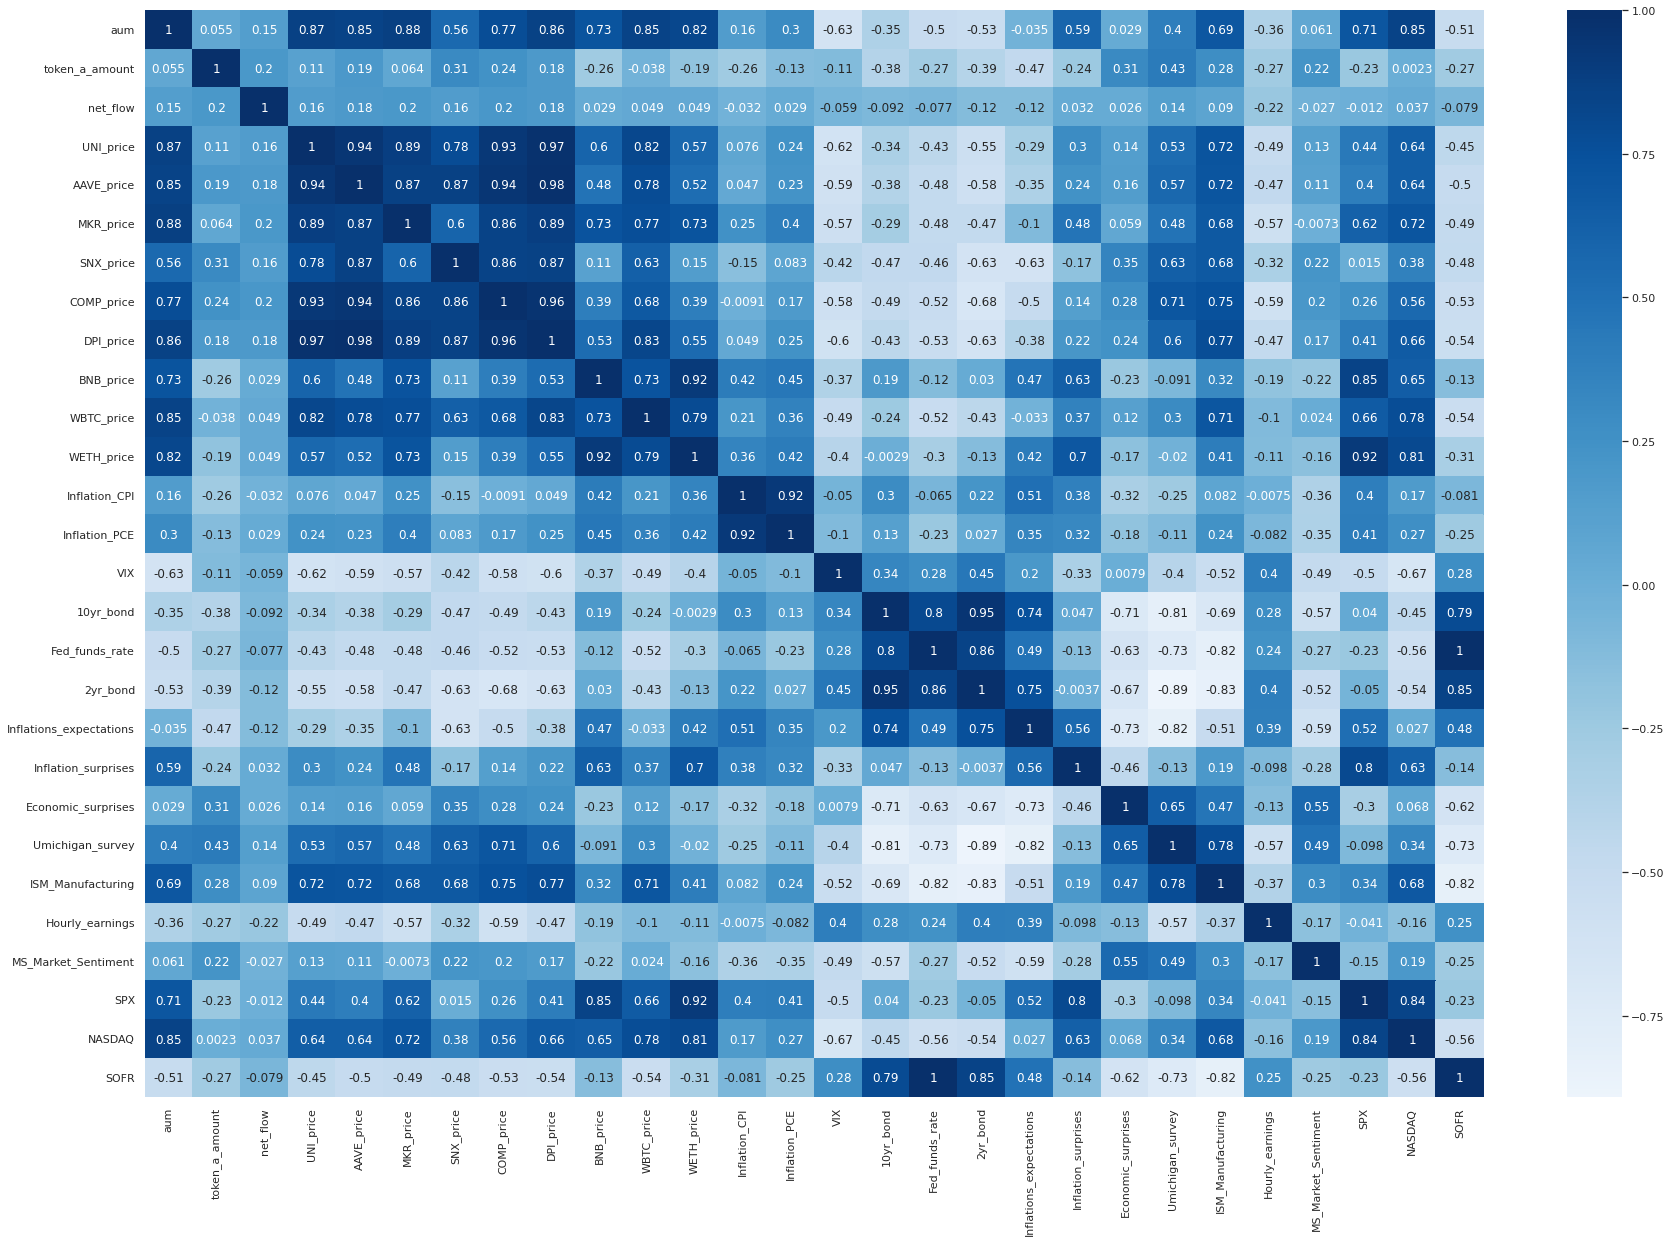

In [10]:
get_correlation_matrix(DPI_dataset,'/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/datasets/DPI_dataset_corr_F') 

DPI_corr = DPI_dataset.corr() 

In [11]:
order = DPI_corr.abs().unstack()
sorted = order.sort_values(ascending = False) 

sorted_2 = sorted.copy()
display(sorted_2) 
# sorted_2 < 1.0 and sorted_2 > 0.75 
type(sorted_2) 



aum                  aum               1.000000
VIX                  VIX               1.000000
UNI_price            UNI_price         1.000000
AAVE_price           AAVE_price        1.000000
MKR_price            MKR_price         1.000000
                                         ...   
Inflation_surprises  2yr_bond          0.003669
10yr_bond            WETH_price        0.002938
WETH_price           10yr_bond         0.002938
token_a_amount       NASDAQ            0.002326
NASDAQ               token_a_amount    0.002326
Length: 784, dtype: float64

pandas.core.series.Series

In [12]:
sorted_3 = sorted_2.loc[lambda x: (x < 1.0) & (x > 0.75)]
sorted_3.drop_duplicates()

### let's write here columns to drop 
### COLS TO DROP ['Fed_funds_rate', 'AAVE_price', 'UNI_price', 'COMP_price', '2yr_bond', 'Inflation_PCE', 'BNB_price', 'WBTC_price', 'Umichigan_survey', 'NASDAQ', 'Inflation_surprises' ]

#### ['NASDAQ_change', 'AAVE_returns', 'Inflation_PCE_change', 'UNI_returns', 'COMP_returns', 'SNX_return', 'WBTC_returns', 'VIX_change' ]

### ['net_flow', 'day', 'CVX_price', 'DYDX_price', 'BNB_price', 'WBTC_price', 'PCE DEFM Index', 'USGG2YR Index', 'CCMP Index'],

Fed_funds_rate           SOFR                 0.996604
DPI_price                AAVE_price           0.978413
UNI_price                DPI_price            0.974427
COMP_price               DPI_price            0.958061
2yr_bond                 10yr_bond            0.954388
AAVE_price               COMP_price           0.943239
                         UNI_price            0.942885
COMP_price               UNI_price            0.930609
Inflation_PCE            Inflation_CPI        0.923562
BNB_price                WETH_price           0.916608
SPX                      WETH_price           0.916362
2yr_bond                 Umichigan_survey     0.892287
DPI_price                MKR_price            0.888246
UNI_price                MKR_price            0.887279
aum                      MKR_price            0.878811
                         UNI_price            0.873863
SNX_price                AAVE_price           0.869922
MKR_price                AAVE_price           0.868093
DPI_price 

**Features to include:** mainly based on the correlation
- aum
- dex activities: token_a_amount
- prices: TRIBE_price, GMI_price, WETH_price
- macro: CPI CHNG Index, VIX Index, USGG10YR Index, NYCNM1IR Index, CSIIUSD Index, ECSURPUS Index, CONSSENT Index, NAPMPMI Index, AHE YOY% Index, MSXAMSIL Index, SPX Index, LIBOR

# Data Preprocessing

In [13]:
DPI_dataset.columns

Index(['aum', 'token_a_amount', 'net_flow', 'UNI_price', 'AAVE_price',
       'MKR_price', 'SNX_price', 'COMP_price', 'DPI_price', 'BNB_price',
       'WBTC_price', 'WETH_price', 'Inflation_CPI', 'Inflation_PCE', 'VIX',
       '10yr_bond', 'Fed_funds_rate', '2yr_bond', 'Inflations_expectations',
       'Inflation_surprises', 'Economic_surprises', 'Umichigan_survey',
       'ISM_Manufacturing', 'Hourly_earnings', 'MS_Market_Sentiment', 'SPX',
       'NASDAQ', 'SOFR'],
      dtype='object')

In [14]:
# columns_to_drop = ['Fed_funds_rate', 'AAVE_price', 'UNI_price', 'COMP_price', 
#                    '2yr_bond', 'Inflation_PCE', 'BNB_price', 'WBTC_price', 
#                    'Umichigan_survey', 'NASDAQ', 'Inflation_surprises' ] 

columns_to_drop = ['token_a_amount', 'Inflation_CPI', 'VIX', 'ISM_Manufacturing', 'Hourly_earnings', 'MS_Market_Sentiment', 'SOFR']

### others to cosnider removing - 'Inflations_expectations', 

X = DPI_dataset.copy() 
X = X.reset_index()
X.drop(columns=['Date', 'net_flow'], inplace=True) 
# X.drop(['BNB_returns', 'WBTC_returns', 'Inflation_PCE_change', '2yr_bond_change', 'NASDAQ_change'], axis = 1, inplace = True)
# X.drop(columns_to_drop, axis = 1, inplace = True)
y = DPI_dataset['net_flow'].copy() 
y = y.reset_index() 
y = y.drop(columns='Date') 

In [15]:
# X 
y 

,net_flow
0,314475.05190
1,729329.67920
2,861171.96300
3,344120.71360
4,-30418.51613
...,...
710,0.00000
711,0.00000
712,0.00000
713,-238218.46220


In [16]:
### DO WE NEED TO SCALE? DOES IT MATTER WORKING WITH RETURNS/CHANGES DIRECTLY? 

X_scaled = pd.DataFrame(preprocessing.scale(X)) 
X_scaled.columns = X.columns 

# y_scaled = pd.DataFrame(preprocessing.scale(y))
# y_scaled 

# X_scaled.rename(columns = {'CPI CHNG Index': 'CPI_CHNG_Index', 'VIX Index': 'VIX_Index', 'USGG10YR Index': 'USGG10YR_Index', 
#              'NYCNM1IR Index': 'NYCNM1IR_Index', 'CSIIUSD Index': 'CSIIUSD_Index', 
#              'ECSURPUS Index': 'ECSURPUS_Index', 'CONSSENT Index': 'CONSSENT_Index',
#              'NAPMPMI Index': 'NAPMPMI_Index', 'AHE YOY% Index': 'AHE_YOY_Index',
#              'MSXAMSIL Index': 'MSXAMSIL_Index', 'SPX Index': 'SPX_Index'}, inplace = True)

In [17]:
X_scaled

,aum,token_a_amount,UNI_price,AAVE_price,MKR_price,SNX_price,COMP_price,DPI_price,BNB_price,WBTC_price,...,Inflations_expectations,Inflation_surprises,Economic_surprises,Umichigan_survey,ISM_Manufacturing,Hourly_earnings,MS_Market_Sentiment,SPX,NASDAQ,SOFR
0,-1.416509,-0.034116,-1.202887,-1.291280,-1.341462,-0.707322,-0.744361,-1.113059,-1.752216,-1.930745,...,-1.369590,-1.208904,2.202060,0.801864,-1.084076,0.096385,1.828042,-1.887691,-1.196616,-0.424912
1,-1.406498,-0.077114,-1.217321,-1.279715,-1.344667,-0.721986,-0.770521,-1.115489,-1.753022,-1.933181,...,-1.369590,-1.208904,2.202060,0.801864,-1.084076,0.096385,1.845679,-1.955224,-1.266914,-0.424912
2,-1.402424,0.051509,-1.236919,-1.316523,-1.357557,-0.773624,-0.792047,-1.144508,-1.751598,-1.933100,...,-1.369590,-1.208904,2.350907,0.801864,-1.084076,0.096385,1.775132,-1.970699,-1.307436,-0.410842
3,-1.408964,-0.265095,-1.228721,-1.363472,-1.372875,-0.801674,-0.812238,-1.178898,-1.754983,-1.937196,...,-1.369590,-1.208904,2.425331,0.801864,-1.084076,0.096385,1.669312,-1.969335,-1.338689,-0.424912
4,-1.413761,-0.315252,-1.237776,-1.366916,-1.368592,-0.809983,-0.811624,-1.189373,-1.756212,-1.938089,...,-1.369590,-1.208904,2.425331,0.801864,-1.084076,0.096385,1.669312,-1.969335,-1.338689,-0.424912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,-1.180585,-0.801807,-0.963591,-1.103075,-1.270623,-1.063064,-1.051245,-1.200080,-0.305697,-1.380022,...,0.624852,-1.085586,-1.333071,-1.246017,-1.989218,0.452535,-1.187820,-1.361308,-1.932293,3.655368
711,-1.172965,-0.837126,-0.956369,-1.098388,-1.249279,-1.058383,-1.047055,-1.189321,-0.272387,-1.378567,...,0.624852,-1.085586,-1.333071,-1.246017,-1.989218,0.452535,-1.187820,-1.361308,-1.932293,3.655368
712,-1.180037,-0.864856,-0.964305,-1.104943,-1.236572,-1.073019,-1.046926,-1.194480,-0.293116,-1.385445,...,0.624852,-1.085586,-1.333071,-1.246017,-1.989218,0.452535,-1.187820,-1.361308,-1.932293,3.655368
713,-1.191259,-0.396881,-0.972548,-1.110969,-1.233715,-1.090301,-1.044850,-1.208397,-0.304829,-1.382910,...,0.624852,-1.085586,-1.333071,-1.246017,-1.989218,0.452535,-1.381823,-1.472188,-1.980312,3.655368


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,  random_state = 1000)   ## test_size=0.20, ## X_scaled 

# Linear Regression

## Ordinary Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [20]:
ols_train = LinearRegression().fit(X_train, y_train)
y_train_predicted = ols_train.predict(X_train)
rmse_train = r2_score(y_true = y_train, y_pred = y_train_predicted)
y_test_predicted = ols_train.predict(X_test)
rmse_test = r2_score(y_true = y_test, y_pred = y_test_predicted)

mse=mean_squared_error(y_test,y_test_predicted)
print("MSE result is: {}".format(mse))

print("Training set R-squared is: {}".format(rmse_train))
print("Test set R-squared is: {}".format(rmse_test)) 

MSE result is: 1248172143373.959
Training set R-squared is: 0.1437025354704966
Test set R-squared is: 0.16042684106433924


## Forward Model Selection: AIC

In [21]:
import statsmodels.formula.api as smf 
def forward_select(X, y):
  data = pd.concat([X, y], axis = 1)
  variate = set(X.columns)
  selected = []
  # set the scores to be infinite
  current_score, best_new_score = float('inf'), float('inf')
  # perform the forward selection
  while variate:
    aic_with_variate = []
    for candidate in variate:
      # set the regression model
      formula = "{}~{}".format(y.columns[0], "+".join(selected + [candidate]))
      print(variate)
      print(formula)
      aic = smf.ols(formula = formula, data = data).fit().aic
      aic_with_variate.append((aic,candidate))
    aic_with_variate.sort(reverse = True)
    best_new_score, best_candidate = aic_with_variate.pop()
    if current_score > best_new_score:
      variate.remove(best_candidate)
      selected.append(best_candidate)
      current_score = best_new_score
      print("AIC is {}, continuing!".format(current_score))
    else:
      print("Forward Selection Done")
      break
  # final regression model
  formula = "{}~{}".format(y.columns[0], "+".join(selected))
  print("Final Regression model is {}".format(formula))
  model = smf.ols(formula = formula, data = data).fit()
  return(model) 

In [22]:
aic_train = forward_select(X_train, pd.DataFrame(y_train)) 

{'NASDAQ', 'UNI_price', 'Inflation_CPI', 'Inflations_expectations', 'SOFR', 'ISM_Manufacturing', 'MS_Market_Sentiment', '2yr_bond', 'COMP_price', 'WETH_price', '10yr_bond', 'Inflation_PCE', 'SNX_price', 'Umichigan_survey', 'MKR_price', 'AAVE_price', 'Hourly_earnings', 'SPX', 'Inflation_surprises', 'DPI_price', 'aum', 'Economic_surprises', 'WBTC_price', 'token_a_amount', 'VIX', 'Fed_funds_rate', 'BNB_price'}
net_flow~NASDAQ
{'NASDAQ', 'UNI_price', 'Inflation_CPI', 'Inflations_expectations', 'SOFR', 'ISM_Manufacturing', 'MS_Market_Sentiment', '2yr_bond', 'COMP_price', 'WETH_price', '10yr_bond', 'Inflation_PCE', 'SNX_price', 'Umichigan_survey', 'MKR_price', 'AAVE_price', 'Hourly_earnings', 'SPX', 'Inflation_surprises', 'DPI_price', 'aum', 'Economic_surprises', 'WBTC_price', 'token_a_amount', 'VIX', 'Fed_funds_rate', 'BNB_price'}
net_flow~UNI_price
{'NASDAQ', 'UNI_price', 'Inflation_CPI', 'Inflations_expectations', 'SOFR', 'ISM_Manufacturing', 'MS_Market_Sentiment', '2yr_bond', 'COMP_price

SyntaxError: ignored

In [23]:
y_train_predicted4 = aic_train.predict(X_train)
rmse_train4 = r2_score(y_true = y_train, y_pred = y_train_predicted4)
y_test_predicted4 = aic_train.predict(X_test)
rmse_test4 = r2_score(y_true = y_test, y_pred = y_test_predicted4)
print("Training set R-squared is: {}".format(rmse_train4))
print("Test set R-squared is: {}".format(rmse_test4))

NameError: ignored

## Ridge Regression

In [26]:
from sklearn.linear_model import Ridge

In [27]:
ridge_train = Ridge(alpha = 1.0).fit(X_train, y_train)
y_train_predicted2 = ridge_train.predict(X_train)
rmse_train2 = r2_score(y_true = y_train, y_pred = y_train_predicted2)
y_test_predicted2 = ridge_train.predict(X_test)
rmse_test2 = r2_score(y_true = y_test, y_pred = y_test_predicted2)
print("Training set R-squared is: {}".format(rmse_train2))
print("Test set R-squared is: {}".format(rmse_test2))

Training set R-squared is: 0.139169035800479
Test set R-squared is: 0.15301780436604895


In [25]:
accs=[]
lamda=[]
for i in np.arange(0,40,0.1):
  ridge_train = Ridge(alpha = i).fit(X_train, y_train)
  y_train_predicted2 = ridge_train.predict(X_train)
  rmse_train2 = r2_score(y_true = y_train, y_pred = y_train_predicted2)
  y_test_predicted2 = ridge_train.predict(X_test)
  rmse_test2 = r2_score(y_true = y_test, y_pred = y_test_predicted2)
  mse=mean_squared_error(y_test,y_test_predicted2)
  accs.append(mse)
  lamda.append(i)


  print("MSE result is: {}".format(mse))
  # print("Training set R-squared is: {}".format(rmse_train2))
  # print("Test set R-squared is: {}".format(rmse_test2))
print(accs)
print(np.argmin(accs))
print(lamda[np.argmin(accs)])

MSE result is: 1248172143373.9639
MSE result is: 1248784616457.5476
MSE result is: 1249892808732.3816
MSE result is: 1251185638074.2676
MSE result is: 1252515857933.159
MSE result is: 1253813327655.589
MSE result is: 1255045848585.245
MSE result is: 1256200421769.943
MSE result is: 1257273870056.8447
MSE result is: 1258267987187.392
MSE result is: 1259186970512.7456
MSE result is: 1260036045563.8652
MSE result is: 1260820729424.0938
MSE result is: 1261546443249.787
MSE result is: 1262218318005.9438
MSE result is: 1262841107584.2375
MSE result is: 1263419161237.3638
MSE result is: 1263956428084.6301
MSE result is: 1264456478145.1584
MSE result is: 1264922531033.296
MSE result is: 1265357487306.7112
MSE result is: 1265763959701.0544
MSE result is: 1266144302793.6675
MSE result is: 1266500640400.1147
MSE result is: 1266834890444.98
MSE result is: 1267148787294.2454
MSE result is: 1267443901668.5642
MSE result is: 1267721658321.375
MSE result is: 1267983351691.268
MSE result is: 1268230159

In [28]:
ridge_train = Ridge(alpha = 0).fit(X_train, y_train)
y_train_predicted2 = ridge_train.predict(X_train)
rmse_train2 = r2_score(y_true = y_train, y_pred = y_train_predicted2)
y_test_predicted2 = ridge_train.predict(X_test)
rmse_test2 = r2_score(y_true = y_test, y_pred = y_test_predicted2)
mse=mean_squared_error(y_test,y_test_predicted)
print("MSE result is: {}".format(mse))
print("Training set R-squared is: {}".format(rmse_train2))
print("Test set R-squared is: {}".format(rmse_test2))

MSE result is: 1248172143373.959
Training set R-squared is: 0.14370253547049672
Test set R-squared is: 0.16042684106433602


## LASSO Regression

In [29]:
from sklearn.linear_model import Lasso

In [33]:
lasso_train = Lasso().fit(X_train, y_train)
y_train_predicted3 = lasso_train.predict(X_train)
rmse_train3 = r2_score(y_true = y_train, y_pred = y_train_predicted3)
y_test_predicted3 = lasso_train.predict(X_test)
lasso_train.coef_
rmse_test3 = r2_score(y_true = y_test, y_pred = y_test_predicted3)
print("Training set R-squared is: {}".format(rmse_train3))
print("Test set R-squared is: {}".format(rmse_test3))

Training set R-squared is: 0.14364431815453693
Test set R-squared is: 0.160203994113851


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.656e+14, tolerance: 1.091e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [32]:
# Test cell for train_lasso()
# coef, intercept = train_lasso(opt_lambda_lasso, X_train, y_train)
coef=lasso_train.coef_
intercept=lasso_train.intercept_
print(coef)

print(intercept)
print(X_train.columns)
feats=X_train.columns
for coef, var in zip(coef, feats):
  print(coef,var)
# Print out the equation
# equation = 'y = {:.2f} + '.format(intercept) + ' + '.join(
#     ['{:.2f}*{}'.format(coef, var) for coef, var in zip(coef, feats)])
# print(equation)

[  840701.65226699    27600.03181385  -888526.37859249 -1363201.88104647
   371024.7861881   -513414.41091468  -344122.54758696  3395932.51416236
  -785254.15400846  -592576.5160232    274240.330892     -59637.34313448
   145223.87997854   -10907.78790114  -484758.06708076  -180981.15810112
  1365586.61000806 -1077775.7817701    201217.74829306  -156028.71478542
  -143423.13393414    22231.66265854    58765.26875269   -87704.88570558
   655163.17340476  -840592.43915499   -49087.19003536]
[148013.21673472]
Index(['aum', 'token_a_amount', 'UNI_price', 'AAVE_price', 'MKR_price',
       'SNX_price', 'COMP_price', 'DPI_price', 'BNB_price', 'WBTC_price',
       'WETH_price', 'Inflation_CPI', 'Inflation_PCE', 'VIX', '10yr_bond',
       'Fed_funds_rate', '2yr_bond', 'Inflations_expectations',
       'Inflation_surprises', 'Economic_surprises', 'Umichigan_survey',
       'ISM_Manufacturing', 'Hourly_earnings', 'MS_Market_Sentiment', 'SPX',
       'NASDAQ', 'SOFR'],
      dtype='object')
840701

In [ ]:
'token_a_amount', 'Inflation_CPI', 'VIX', 'ISM_Manufacturing', 'Hourly_earnings', 'MS_Market_Sentiment', 'SOFR' 

#K Nearest Neighbours

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [35]:
KNN_train = KNeighborsRegressor(n_neighbors=4).fit(X_train, y_train)
y_train_predicted = KNN_train.predict(X_train)
rmse_train = r2_score(y_true = y_train, y_pred = y_train_predicted)
y_test_predicted = KNN_train.predict(X_test)
rmse_test = r2_score(y_true = y_test, y_pred = y_test_predicted)
print("Training set R-squared is: {}".format(rmse_train))
print("Test set R-squared is: {}".format(rmse_test))

Training set R-squared is: 0.3903731818513819
Test set R-squared is: 0.11163131008262506


# SVR

In [36]:
from sklearn.svm import SVR

In [37]:
SVM_train = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1).fit(X_train, y_train)
#svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
#svr_lin = SVR(kernel="linear", C=100, gamma="auto")
y_train_predicted = SVM_train.predict(X_train)
rmse_train = r2_score(y_true = y_train, y_pred = y_train_predicted)
y_test_predicted = SVM_train.predict(X_test)
rmse_test = r2_score(y_true = y_test, y_pred = y_test_predicted)
print("Training set R-squared is: {}".format(rmse_train))
print("Test set R-squared is: {}".format(rmse_test))

Training set R-squared is: -0.0039031768486212925
Test set R-squared is: -0.018573218776737344


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Ensemble Trees

## Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
RF_train = RandomForestRegressor(n_estimators=100, max_features=10, n_jobs=-1, random_state=42).fit(X_train, y_train)
y_train_predicted = RF_train.predict(X_train)
rmse_train = r2_score(y_true = y_train, y_pred = y_train_predicted)
y_test_predicted = RF_train.predict(X_test)
rmse_test = r2_score(y_true = y_test, y_pred = y_test_predicted)
print("Training set R-squared is: {}".format(rmse_train))
print("Test set R-squared is: {}".format(rmse_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Training set R-squared is: 0.8776434446065251
Test set R-squared is: 0.1326177803321973


## Extra Trees

In [40]:
from sklearn.ensemble import ExtraTreesRegressor

In [43]:
ET_train = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
y_train_predicted = ET_train.predict(X_train)
rmse_train = r2_score(y_true = y_train, y_pred = y_train_predicted)
y_test_predicted = ET_train.predict(X_test)
rmse_test = r2_score(y_true = y_test, y_pred = y_test_predicted)
print("Training set R-squared is: {}".format(rmse_train))
print("Test set R-squared is: {}".format(rmse_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Training set R-squared is: 0.873206999333215
Test set R-squared is: 0.15888665027916093


# Boosting

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
AB_train = AdaBoostRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
y_train_predicted = AB_train.predict(X_train)
rmse_train = r2_score(y_true = y_train, y_pred = y_train_predicted)
y_test_predicted = AB_train.predict(X_test)
rmse_test = r2_score(y_true = y_test, y_pred = y_test_predicted)
print("Training set R-squared is: {}".format(rmse_train))
print("Test set R-squared is: {}".format(rmse_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training set R-squared is: 0.5744405083408834
Test set R-squared is: -0.1333407792676471


## Gradient Boosting

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

In [45]:
GB_train = GradientBoostingRegressor(random_state=42).fit(X_train, y_train)
y_train_predicted = GB_train.predict(X_train)
rmse_train = r2_score(y_true = y_train, y_pred = y_train_predicted)
y_test_predicted = GB_train.predict(X_test)
rmse_test = r2_score(y_true = y_test, y_pred = y_test_predicted)

mse=mean_squared_error(y_test,y_test_predicted)
print("MSE result is: {}".format(mse))

print("Training set R-squared is: {}".format(rmse_train))
print("Test set R-squared is: {}".format(rmse_test))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE result is: 1219839631588.0208
Training set R-squared is: 0.8996694011515479
Test set R-squared is: 0.17948448190897648


## XG Boost

In [46]:
from xgboost import XGBRegressor

In [47]:
XGB_train = XGBRegressor(objective ='reg:squarederror',n_estimators = 100, random_state=42).fit(X_train, y_train)
y_train_predicted = XGB_train.predict(X_train)
rmse_train = r2_score(y_true = y_train, y_pred = y_train_predicted)
y_test_predicted = XGB_train.predict(X_test)
rmse_test = r2_score(y_true = y_test, y_pred = y_test_predicted)
print("Training set R-squared is: {}".format(rmse_train))
print("Test set R-squared is: {}".format(rmse_test))

Training set R-squared is: 0.8767602703858657
Test set R-squared is: 0.1761620381153588
